In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | kerman
Processing Record 3 of Set 1 | katsuura
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | adrar
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | mananjary
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | rio grande
Processing Record 17 of Set 1 | jijiga
Processing Record 18 of Set 1 | biscarrosse
Processing Record 19 of Set 1 | poum
Processing Record 20 of Set 1 | paamiut
Processing Record 21 of Set 1 | flinders
Processing Record 22 of Set 1 | makak

Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | nome
Processing Record 43 of Set 4 | cacapava
Processing Record 44 of Set 4 | provideniya
Processing Record 45 of Set 4 | luanda
Processing Record 46 of Set 4 | birin
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | sistranda
Processing Record 49 of Set 4 | svetlyy
Processing Record 50 of Set 4 | iqaluit
Processing Record 1 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 5 | passo de camaragibe
Processing Record 3 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 4 of Set 5 | abapo
Processing Record 5 of Set 5 | pundaguitan
Processing Record 6 of Set 5 | kysyl-syr
Processing Record 7 of Set 5 | darhan
Processing Record 8 of Set 5 | piranhas
Processing Record 9 of Set 5 | ribeira grande
Processing Record 10 of Set 5 | bandarbeyla
Processing Record 11 of Set 5 | bani
Processing Record 12 of Set 5 | constitucion


Processing Record 29 of Set 8 | leningradskiy
Processing Record 30 of Set 8 | hutchinson
Processing Record 31 of Set 8 | potam
Processing Record 32 of Set 8 | kindu
Processing Record 33 of Set 8 | yar-sale
Processing Record 34 of Set 8 | oistins
Processing Record 35 of Set 8 | saint-joseph
Processing Record 36 of Set 8 | paytug
City not found. Skipping...
Processing Record 37 of Set 8 | karamea
City not found. Skipping...
Processing Record 38 of Set 8 | gazli
Processing Record 39 of Set 8 | caravelas
Processing Record 40 of Set 8 | tucuman
Processing Record 41 of Set 8 | cajamarca
Processing Record 42 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 43 of Set 8 | ardakan
Processing Record 44 of Set 8 | lexington
Processing Record 45 of Set 8 | canton
Processing Record 46 of Set 8 | hihifo
City not found. Skipping...
Processing Record 47 of Set 8 | priargunsk
Processing Record 48 of Set 8 | kargapolye
City not found. Skipping...
Processing Record 49 of Set 8 | pangoa

Processing Record 15 of Set 12 | xapuri
Processing Record 16 of Set 12 | antigonish
Processing Record 17 of Set 12 | nuristan
Processing Record 18 of Set 12 | soure
Processing Record 19 of Set 12 | grindavik
Processing Record 20 of Set 12 | caldas novas
Processing Record 21 of Set 12 | pombas
Processing Record 22 of Set 12 | bozeman
Processing Record 23 of Set 12 | bari
Processing Record 24 of Set 12 | mindelo
Processing Record 25 of Set 12 | newport
Processing Record 26 of Set 12 | grand centre
City not found. Skipping...
Processing Record 27 of Set 12 | college
Processing Record 28 of Set 12 | daru
Processing Record 29 of Set 12 | cockburn town
Processing Record 30 of Set 12 | luklukan
Processing Record 31 of Set 12 | troitskoye
Processing Record 32 of Set 12 | aden
Processing Record 33 of Set 12 | san-pedro
Processing Record 34 of Set 12 | kavaratti
Processing Record 35 of Set 12 | chokurdakh
Processing Record 36 of Set 12 | imbituba
Processing Record 37 of Set 12 | ouro preto
Proce

In [10]:
len(city_data)

552

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,85.78,40,17,3.00,US,2022-05-12 21:35:15
1,Kerman,30.2832,57.0788,62.46,15,0,9.22,IR,2022-05-12 21:37:09
2,Katsuura,35.1333,140.3000,64.42,99,100,6.06,JP,2022-05-12 21:35:23
3,Jamestown,42.0970,-79.2353,83.84,20,0,0.00,US,2022-05-12 21:37:00
4,Puerto Ayora,-0.7393,-90.3518,82.36,90,52,4.00,EC,2022-05-12 21:37:10
5,Adrar,20.5022,-10.0711,91.00,11,2,10.40,MR,2022-05-12 21:37:11
6,Lebu,-37.6167,-73.6500,53.47,86,90,7.38,CL,2022-05-12 21:37:11
7,Mananjary,-21.2167,48.3333,70.14,88,88,1.92,MG,2022-05-12 21:37:12
8,Bredasdorp,-34.5322,20.0403,55.36,68,2,8.28,ZA,2022-05-12 21:37:12
9,Mataura,-46.1927,168.8643,48.47,78,100,2.44,NZ,2022-05-12 21:37:13


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [13]:
city_data_df =city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-05-12 21:35:15,42.6001,-73.9662,85.78,40,17,3.00
1,Kerman,IR,2022-05-12 21:37:09,30.2832,57.0788,62.46,15,0,9.22
2,Katsuura,JP,2022-05-12 21:35:23,35.1333,140.3000,64.42,99,100,6.06
3,Jamestown,US,2022-05-12 21:37:00,42.0970,-79.2353,83.84,20,0,0.00
4,Puerto Ayora,EC,2022-05-12 21:37:10,-0.7393,-90.3518,82.36,90,52,4.00
5,Adrar,MR,2022-05-12 21:37:11,20.5022,-10.0711,91.00,11,2,10.40
6,Lebu,CL,2022-05-12 21:37:11,-37.6167,-73.6500,53.47,86,90,7.38
7,Mananjary,MG,2022-05-12 21:37:12,-21.2167,48.3333,70.14,88,88,1.92
8,Bredasdorp,ZA,2022-05-12 21:37:12,-34.5322,20.0403,55.36,68,2,8.28
9,Mataura,NZ,2022-05-12 21:37:13,-46.1927,168.8643,48.47,78,100,2.44


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract  relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

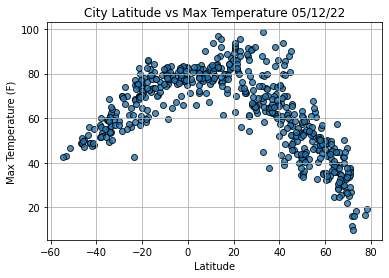

In [16]:
# Import time module
import time

# Build the scatter plot for lat vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show the plot
plt.show()

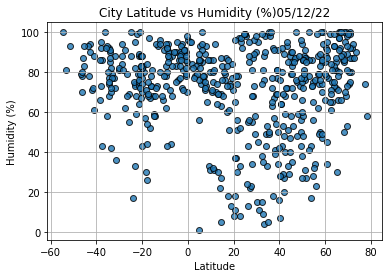

In [17]:
# Build the scatter plot for lat vs max temp
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs Humidity (%)' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show the plot
plt.show()

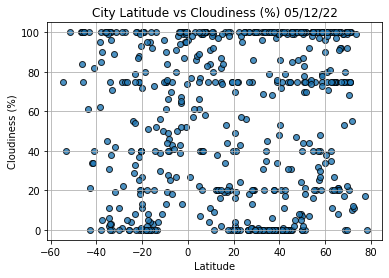

In [18]:
# Build the scatter plot for lat vs max temp
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show the plot
plt.show()

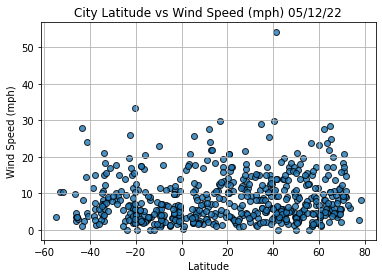

In [19]:
# Build the scatter plot for lat vs max temp
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs Wind Speed (mph) ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show the plot
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and a plot of regression line and the eqaution with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
        # Run regression on hemisphere weather data
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
        
        #Calculate the regression line 'y values' from the slope and intercept
        regress_values = x_values * slope + intercept
        # Get the equation of the line
        line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
        # create a scatter plot and plot the regression lines
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,'r')
        # Annotate the text for the line equation
        plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                   Rio Grande
Country                        BR
Date          2022-05-12 21:37:15
Lat                       -32.035
Lng                      -52.0986
Max Temp                    60.91
Humidity                       72
Cloudiness                     42
Wind Speed                   8.46
Name: 13, dtype: object

In [26]:
city_data_df['Lat'] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
547     True
548     True
549     True
550     True
551    False
Name: Lat, Length: 552, dtype: bool

In [28]:
city_data_df.loc[(city_data_df['Lat'] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-05-12 21:35:15,42.6001,-73.9662,85.78,40,17,3.00
1,Kerman,IR,2022-05-12 21:37:09,30.2832,57.0788,62.46,15,0,9.22
2,Katsuura,JP,2022-05-12 21:35:23,35.1333,140.3000,64.42,99,100,6.06
3,Jamestown,US,2022-05-12 21:37:00,42.0970,-79.2353,83.84,20,0,0.00
5,Adrar,MR,2022-05-12 21:37:11,20.5022,-10.0711,91.00,11,2,10.40


In [29]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <0)]

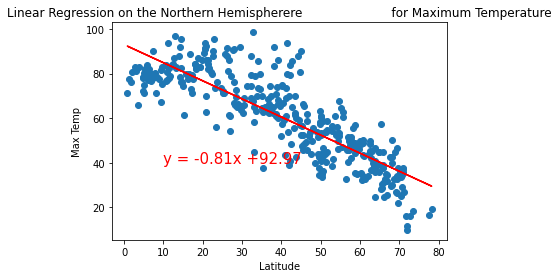

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the FUNCTION
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemispherere \
                      for Maximum Temperature', 'Max Temp',(10,40))

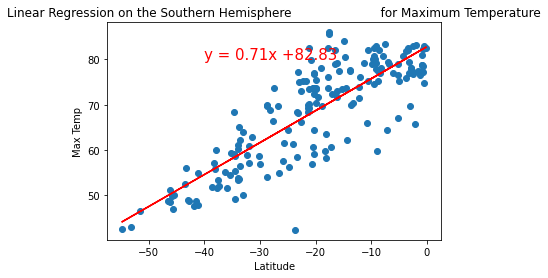

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (-40,80))

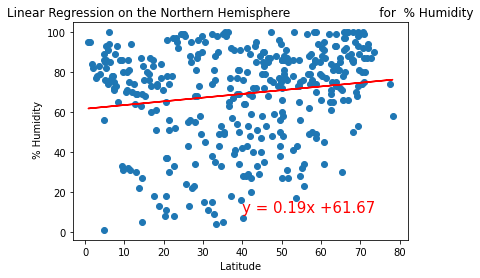

In [35]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for  % Humidity', ' % Humidity', (40,10))

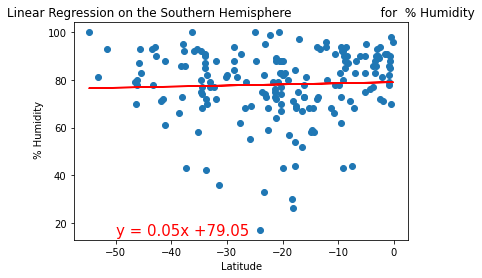

In [36]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for  % Humidity', ' % Humidity', (-50,15))

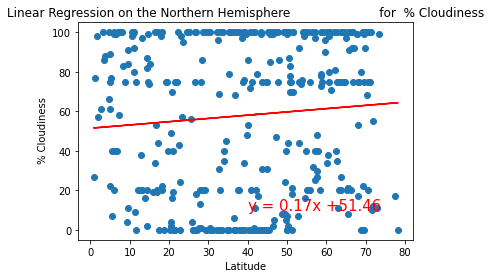

In [39]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for  % Cloudiness', ' % Cloudiness', (40,10))

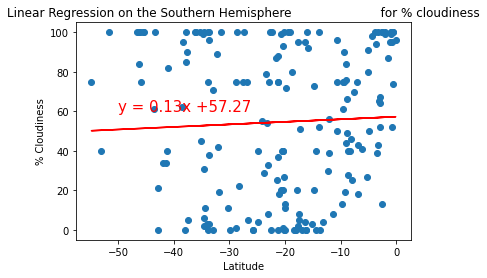

In [40]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % cloudiness', '% Cloudiness', (-50,60))

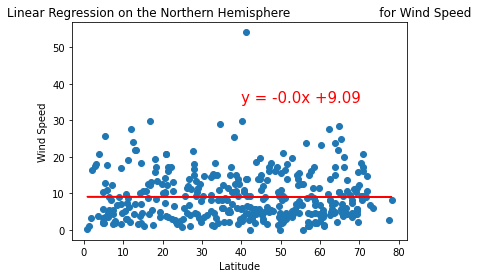

In [41]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed', 'Wind Speed', (40,35))

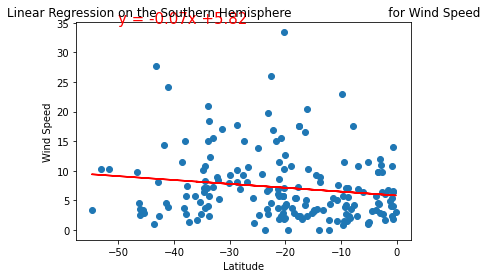

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))